In [2]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.5f}'.format

# Download latest version
data_path = kagglehub.dataset_download("firecastrl/us-wildfire-dataset")

print("Path to dataset files:", data_path)

print(os.listdir(data_path))

file_path = os.path.join(data_path, "Wildfire_Dataset.csv")
wild_fires = pd.read_csv(file_path)
wild_fires.head()

100%|██████████| 281M/281M [00:02<00:00, 136MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/firecastrl/us-wildfire-dataset/versions/1
['Wildfire_Dataset.csv']


,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
0,48.12843,-97.27669,2018-08-15,No,0.00000,78.60000,14.90000,0.00582,272.60000,282.00000,301.60000,3.00000,40.00000,10.20000,12.20000,54.00000,7.50000,5.50000,1.59000
1,48.12843,-97.27669,2018-08-16,No,0.00000,80.40000,13.90000,0.00676,264.00000,283.90000,304.90000,3.00000,40.00000,9.70000,12.00000,56.00000,8.20000,5.90000,1.93000
2,48.12843,-97.27669,2018-08-17,No,0.00000,70.90000,20.40000,0.00672,265.60000,285.80000,300.70000,3.10000,40.00000,9.20000,11.90000,56.00000,7.20000,5.30000,1.51000
3,48.12843,-97.27669,2018-08-18,No,5.00000,65.20000,19.40000,0.00756,261.40000,289.00000,303.30000,5.10000,0.00000,9.90000,12.00000,40.00000,10.00000,6.90000,1.85000
4,48.12843,-97.27669,2018-08-19,No,0.00000,100.00000,42.20000,0.00895,166.80000,283.80000,296.50000,4.70000,41.00000,11.80000,12.10000,47.00000,4.60000,3.40000,0.66000


In [2]:
wild_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9509925 entries, 0 to 9509924
Data columns (total 19 columns):
 #   Column     Dtype  
---  ------     -----  
 0   latitude   float64
 1   longitude  float64
 2   datetime   object 
 3   Wildfire   object 
 4   pr         float64
 5   rmax       float64
 6   rmin       float64
 7   sph        float64
 8   srad       float64
 9   tmmn       float64
 10  tmmx       float64
 11  vs         float64
 12  bi         float64
 13  fm100      float64
 14  fm1000     float64
 15  erc        float64
 16  etr        float64
 17  pet        float64
 18  vpd        float64
dtypes: float64(17), object(2)
memory usage: 1.3+ GB


In [3]:
import pandas as pd

# Suppose your DataFrame is called df
df = wild_fires.copy()
# Columns of interest
cols_of_interest = ['rmax', 'tmmx', 'vs', 'fm100']

# Compute stats
stats = pd.DataFrame({
    "max": df[cols_of_interest].max(),
    "min": df[cols_of_interest].min(),
    "range": df[cols_of_interest].max() - df[cols_of_interest].min()
})

print(stats)


           max    min    range
rmax  32767.00   5.00 32762.00
tmmx  32767.00 241.90 32525.10
vs    32767.00   0.30 32766.70
fm100 32767.00   1.10 32765.90


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'pr'}>, <Axes: title={'center': 'rmax'}>],
       [<Axes: title={'center': 'rmin'}>,
        <Axes: title={'center': 'sph'}>,
        <Axes: title={'center': 'srad'}>,
        <Axes: title={'center': 'tmmn'}>],
       [<Axes: title={'center': 'tmmx'}>, <Axes: title={'center': 'vs'}>,
        <Axes: title={'center': 'bi'}>,
        <Axes: title={'center': 'fm100'}>],
       [<Axes: title={'center': 'fm1000'}>,
        <Axes: title={'center': 'erc'}>, <Axes: title={'center': 'etr'}>,
        <Axes: title={'center': 'pet'}>],
       [<Axes: title={'center': 'vpd'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

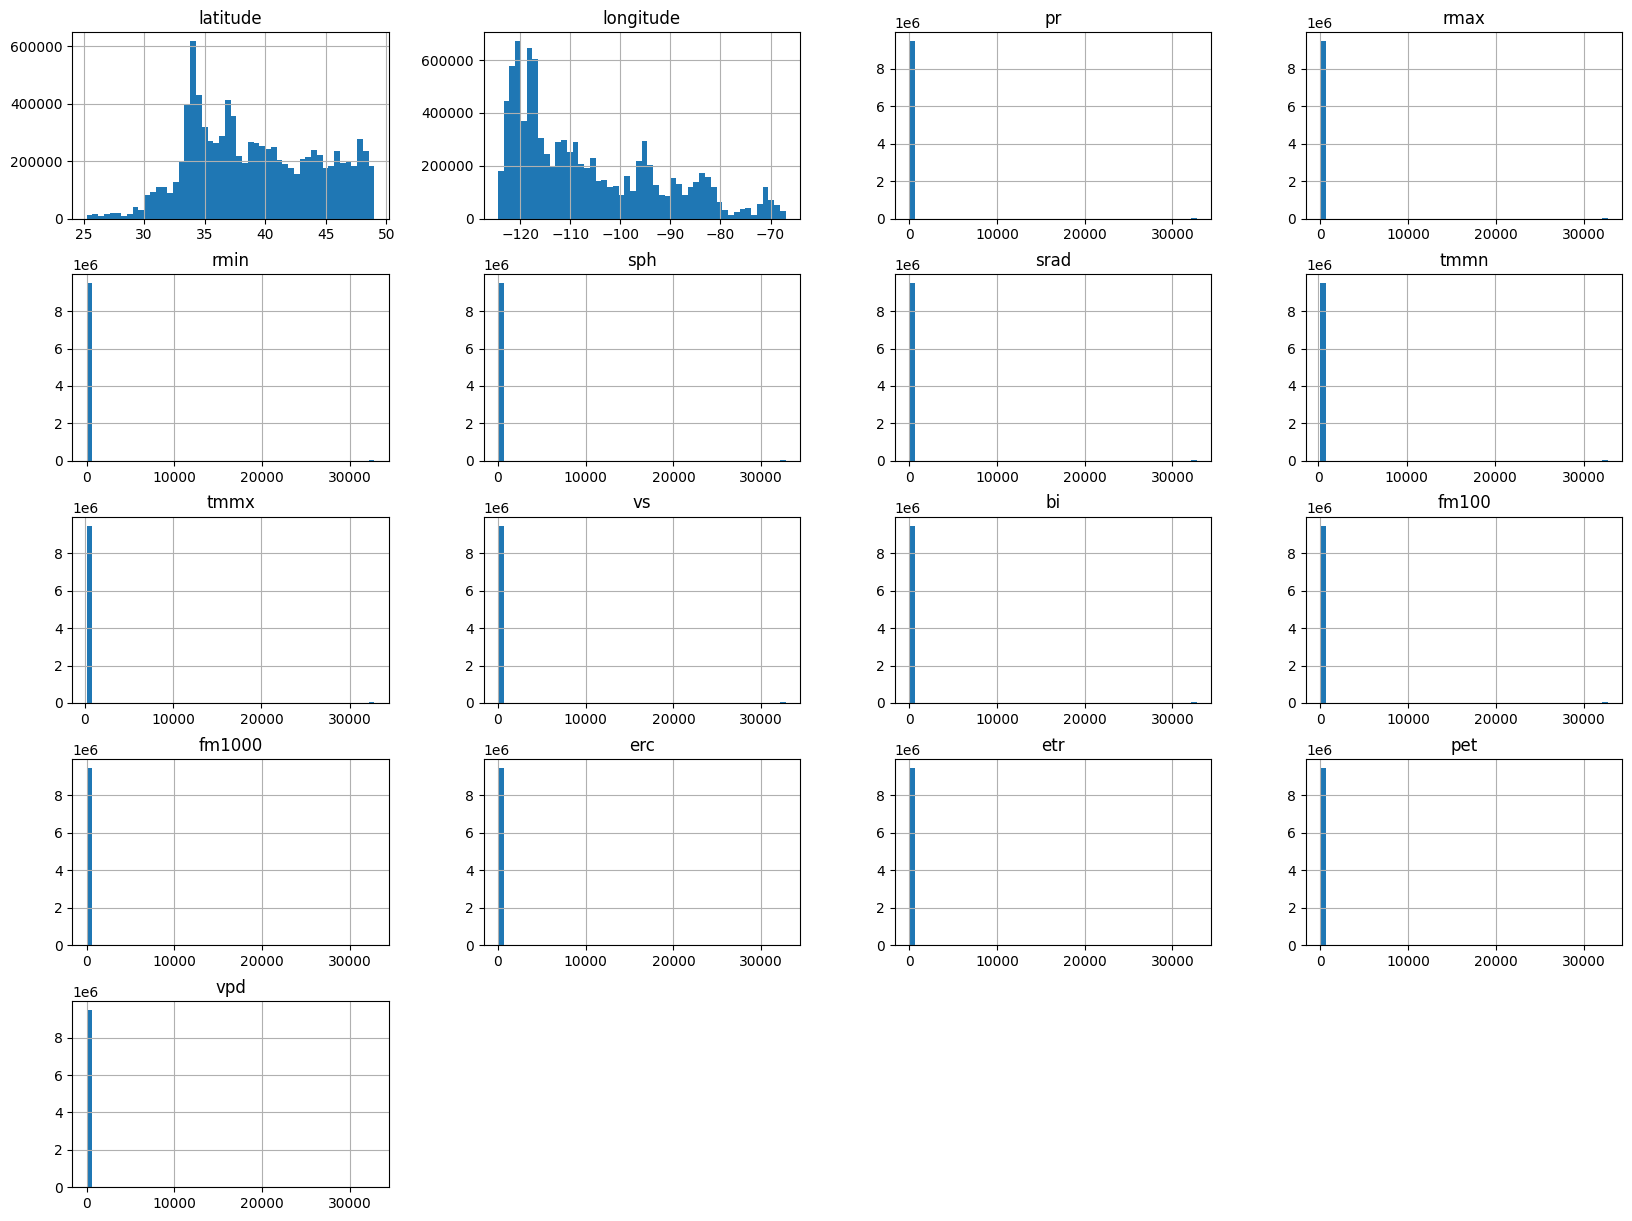

In [4]:

wild_fires.hist(bins=50, figsize=(20,15))

In [5]:
wild_fires.describe()


,latitude,longitude,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
count,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00,9509925.00
mean,39.14,-106.43,90.37,164.58,122.07,88.64,309.16,368.21,382.14,92.39,122.17,101.39,103.10,132.09,94.26,92.76,89.77
std,5.27,14.57,1701.84,1698.09,1700.27,1701.91,1692.72,1687.38,1686.66,1701.72,1700.34,1701.26,1701.17,1699.82,1701.62,1701.70,1701.86
min,25.26,-124.44,0.00,5.00,1.00,0.00,0.00,230.90,241.90,0.30,0.00,1.10,2.10,0.00,0.00,0.00,0.00
25%,34.69,-118.34,0.00,61.80,19.30,0.00,147.20,274.90,287.90,2.60,19.00,8.70,10.30,25.00,3.20,2.30,0.47
50%,38.53,-110.93,0.00,80.00,30.80,0.01,227.70,281.10,295.50,3.40,34.00,12.90,14.80,39.00,5.40,4.10,0.92
75%,43.67,-95.42,0.00,95.20,45.50,0.01,300.10,286.40,301.90,4.60,50.00,16.60,18.40,61.00,7.70,5.80,1.58
max,49.00,-67.01,32767.00,32767.00,32767.00,32767.00,32767.00,32767.00,32767.00,32767.00,32767.00,32767.00,32767.00,32767.00,32767.00,32767.00,32767.00


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['rmax', 'tmmx', 'vs', 'fm100']



<Axes: >

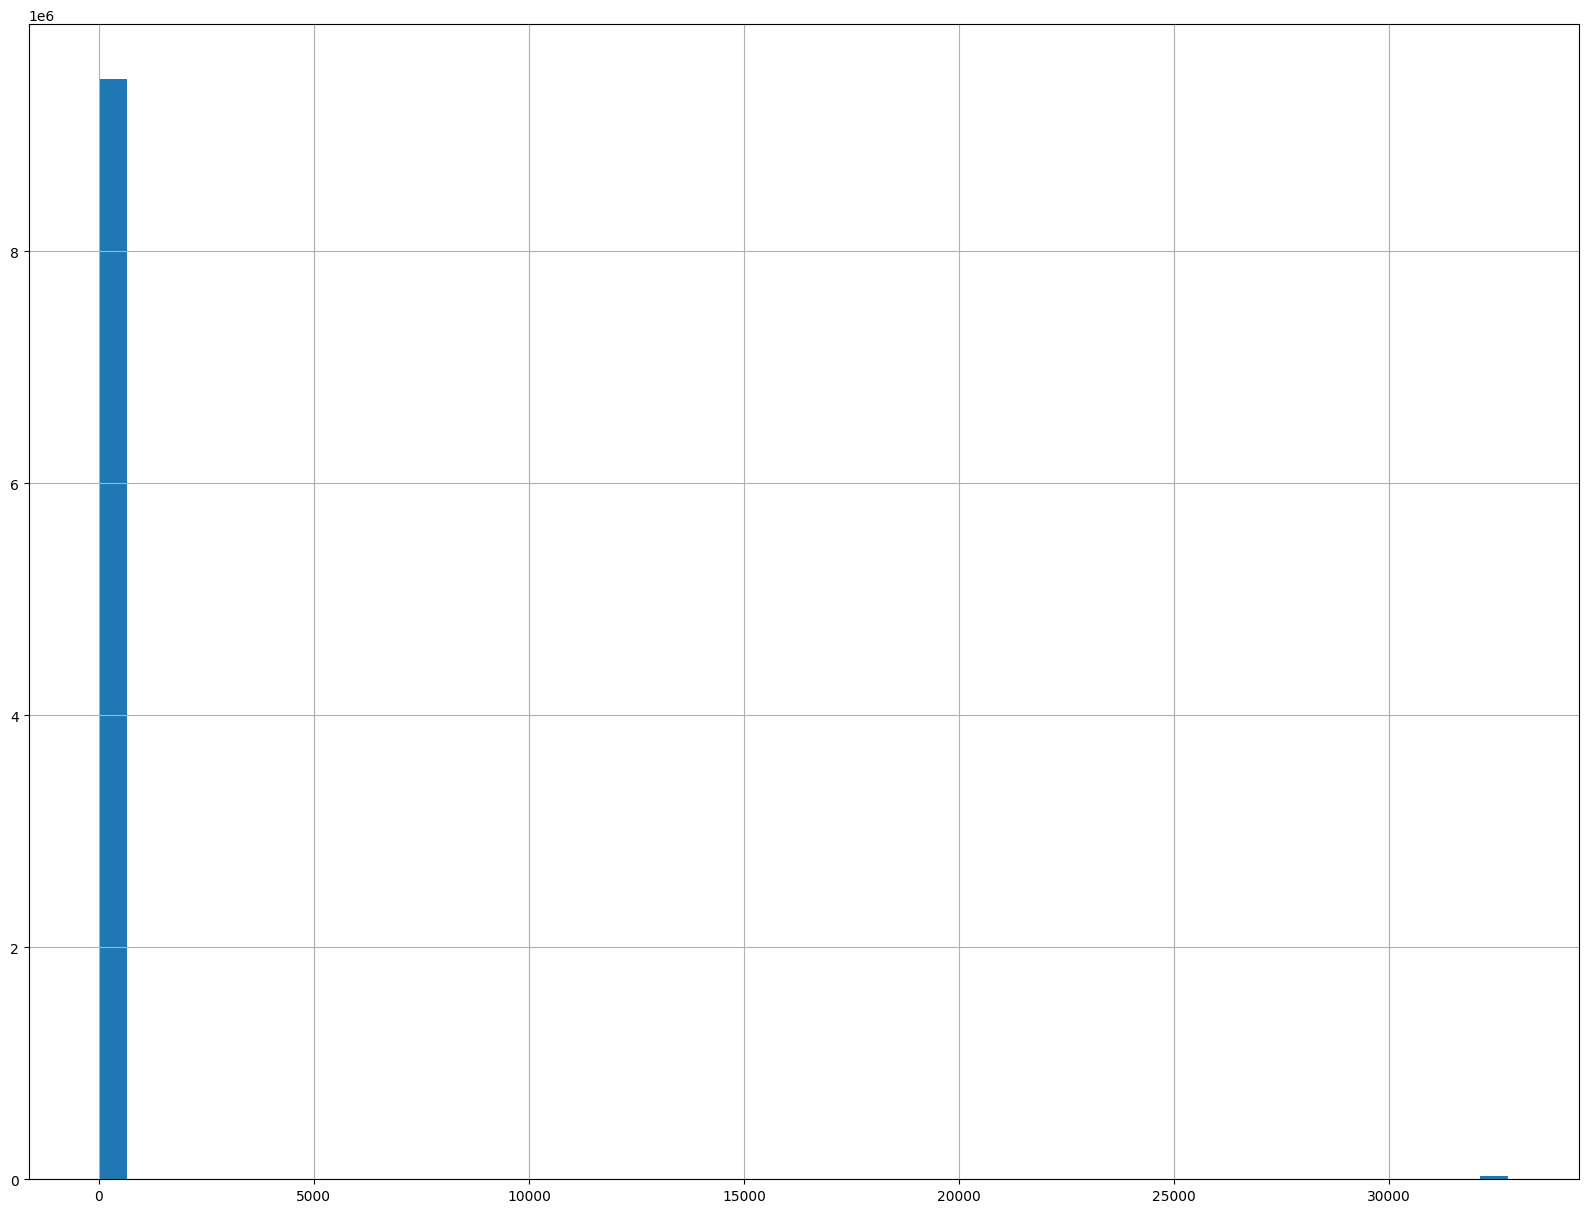

In [7]:
wild_fires.rmax.hist(bins=50, figsize=(20,15))

<Axes: >

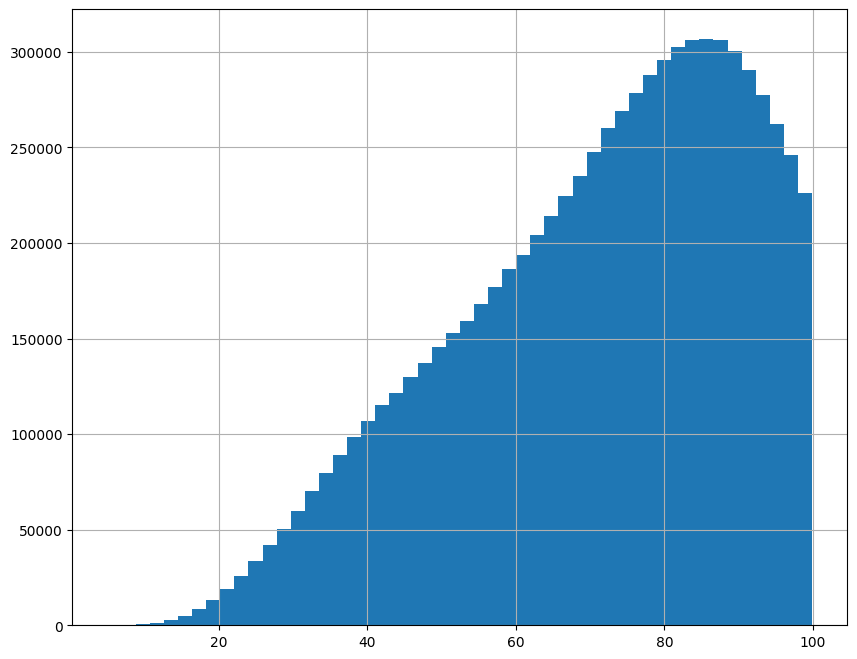

In [8]:
features = ['rmax', 'tmmx', 'vs', 'fm100']

rmax_threshold = wild_fires['rmax'].quantile(0.99)
filtered_rmax = wild_fires.loc[wild_fires['rmax'] < rmax_threshold, 'rmax']

filtered_rmax.hist(bins=50, figsize=(10, 8))


In [15]:
filtered_rmax.describe()

,rmax
count,7735064.00000
mean,70.74993
std,19.27940
min,5.00000
25%,57.30000
50%,74.00000
75%,86.50000
max,99.90000


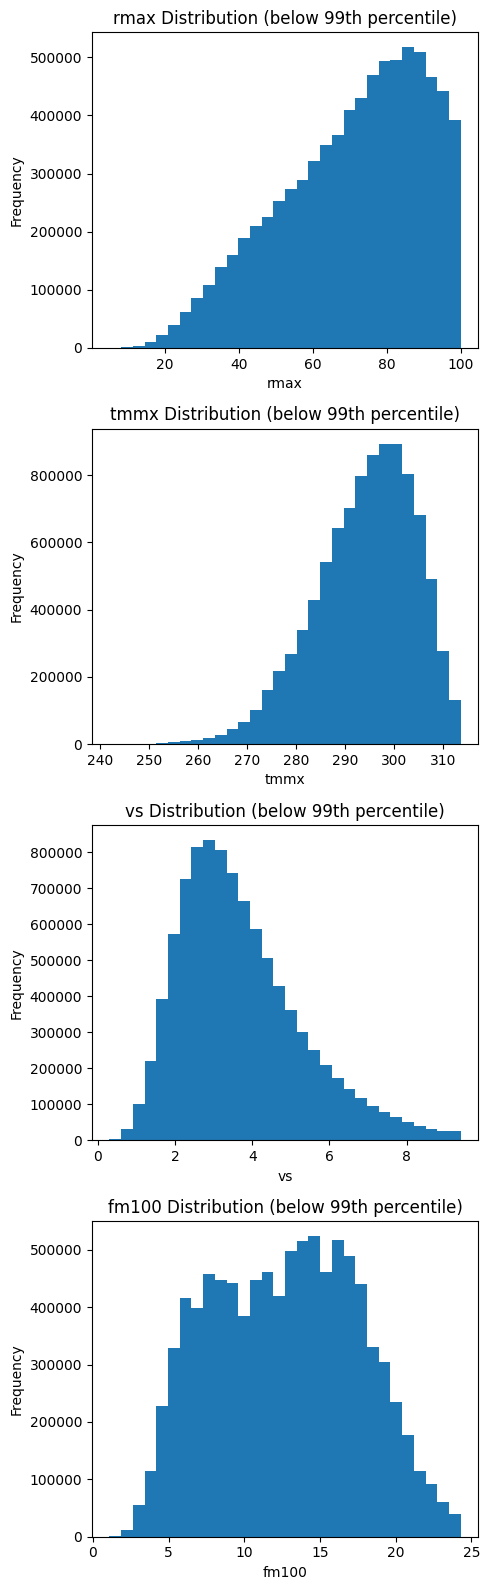

In [9]:
import matplotlib.pyplot as plt

# List of features you want to analyze
features = ['rmax', 'tmmx', 'vs', 'fm100']

# Create subplots — one per feature
fig, axes = plt.subplots(len(features), 1, figsize=(5, 4 * len(features)))

for i, feature in enumerate(features):
    # Calculate 99th percentile threshold
    threshold = wild_fires[feature].quantile(0.99)

    # Filter out extreme values (keep values below 99th percentile)
    filtered = wild_fires.loc[wild_fires[feature] < threshold, feature]

    # Plot histogram
    axes[i].hist(filtered, bins=30)
    axes[i].set_title(f'{feature} Distribution (below 99th percentile)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def clean_and_plot(df, features, upper_q=0.99):
    """
    Filters outliers outside given quantile thresholds for each feature,
    plots the distributions, and returns a cleaned DataFrame.

    Parameters:
        df (pd.DataFrame): Input dataframe
        features (list[str]): List of feature columns to analyze
        lower_q (float): Lower quantile threshold (default 0.01)
        upper_q (float): Upper quantile threshold (default 0.99)

    Returns:
        pd.DataFrame: Cleaned DataFrame with outliers removed
    """
    cleaned_df = df.copy()

    # Track how many rows get dropped per feature
    dropped_summary = {}

    fig, axes = plt.subplots(len(features), 1, figsize=(5, 4 * len(features)))

    for i, feature in enumerate(features):
        # lower = cleaned_df[feature].quantile(lower_q)
        upper = cleaned_df[feature].quantile(upper_q)

        # Keep only rows within range
        before_rows = len(cleaned_df)
        # cleaned_df = cleaned_df[(cleaned_df[feature] >= lower) & (cleaned_df[feature] <= upper)]
        cleaned_df = cleaned_df[(cleaned_df[feature] <= upper)]
        after_rows = len(cleaned_df)
        dropped_summary[feature] = before_rows - after_rows

        # Plot histogram of the original (filtered for visualization only)
        filtered = df.loc[df[feature] <= upper, feature]
        axes[i].hist(filtered, bins=50)
        axes[i].set_title(f"{feature} Distribution – {upper_q*100:.0f} percentile)")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    print("\nDropped Rows Summary:")
    for feature, dropped in dropped_summary.items():
        print(f" - {feature}: {dropped} rows removed")

    return cleaned_df


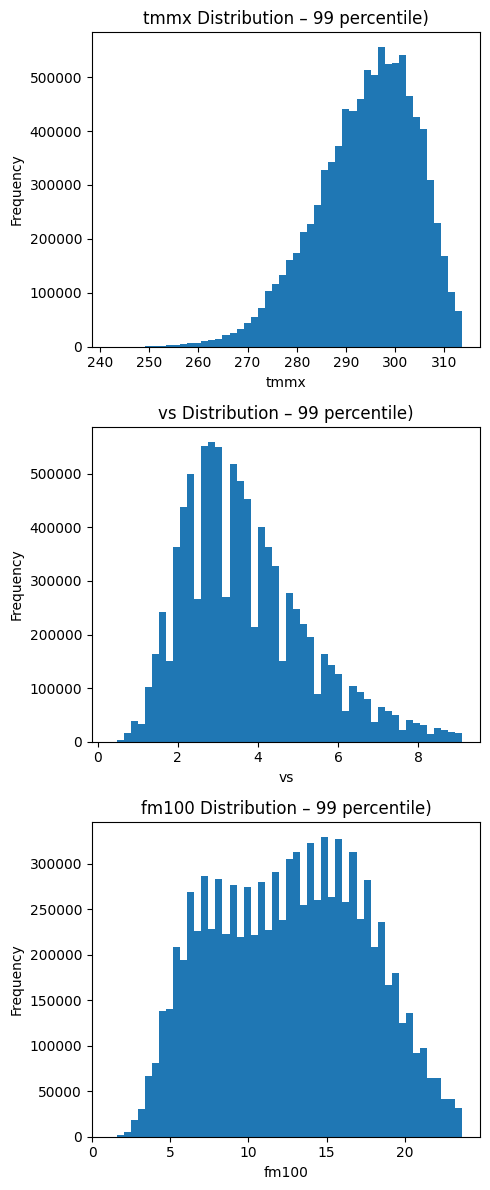


Dropped Rows Summary:
 - tmmx: 95034 rows removed
 - vs: 89154 rows removed
 - fm100: 92303 rows removed


Index(['latitude', 'longitude', 'datetime', 'Wildfire', 'pr', 'rmax', 'rmin',
       'sph', 'srad', 'tmmn', 'tmmx', 'vs', 'bi', 'fm100', 'fm1000', 'erc',
       'etr', 'pet', 'vpd'],
      dtype='object')

In [4]:
# features = ['rmax', 'tmmx', 'vs', 'fm100']
features = ['tmmx', 'vs', 'fm100']
wild_fires_cleaned = clean_and_plot(wild_fires, features)
wild_fires_cleaned.columns


In [5]:
wild_fires_cleaned.head()

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
0,48.12843,-97.27669,2018-08-15,No,0.00000,78.60000,14.90000,0.00582,272.60000,282.00000,301.60000,3.00000,40.00000,10.20000,12.20000,54.00000,7.50000,5.50000,1.59000
1,48.12843,-97.27669,2018-08-16,No,0.00000,80.40000,13.90000,0.00676,264.00000,283.90000,304.90000,3.00000,40.00000,9.70000,12.00000,56.00000,8.20000,5.90000,1.93000
2,48.12843,-97.27669,2018-08-17,No,0.00000,70.90000,20.40000,0.00672,265.60000,285.80000,300.70000,3.10000,40.00000,9.20000,11.90000,56.00000,7.20000,5.30000,1.51000
3,48.12843,-97.27669,2018-08-18,No,5.00000,65.20000,19.40000,0.00756,261.40000,289.00000,303.30000,5.10000,0.00000,9.90000,12.00000,40.00000,10.00000,6.90000,1.85000
4,48.12843,-97.27669,2018-08-19,No,0.00000,100.00000,42.20000,0.00895,166.80000,283.80000,296.50000,4.70000,41.00000,11.80000,12.10000,47.00000,4.60000,3.40000,0.66000


In [5]:
df = wild_fires_cleaned[['latitude',	'longitude', 'datetime', 'rmax', 'tmmx', 'vs', 'fm100', 'Wildfire']]
df['datetime'] = pd.to_datetime(df['datetime'])
df['Wildfire'] = df['Wildfire'].map({'Yes': 1, 'No': 0})
df.head()

/tmp/ipython-input-636930607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])
/tmp/ipython-input-636930607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wildfire'] = df['Wildfire'].map({'Yes': 1, 'No': 0})


,latitude,longitude,datetime,rmax,tmmx,vs,fm100,Wildfire
0,48.12843,-97.27669,2018-08-15,78.60000,301.60000,3.00000,10.20000,0
1,48.12843,-97.27669,2018-08-16,80.40000,304.90000,3.00000,9.70000,0
2,48.12843,-97.27669,2018-08-17,70.90000,300.70000,3.10000,9.20000,0
3,48.12843,-97.27669,2018-08-18,65.20000,303.30000,5.10000,9.90000,0
4,48.12843,-97.27669,2018-08-19,100.00000,296.50000,4.70000,11.80000,0


In [6]:
df['Wildfire'].value_counts()

,count
Wildfire,
0,8745246
1,488188


In [17]:
wild_fires['Wildfire'] = wild_fires['Wildfire'].map({'Yes': 1, 'No': 0})
wild_fires['Wildfire'].value_counts() - df['Wildfire'].value_counts()

,count
Wildfire,


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'datetime'}>],
       [<Axes: title={'center': 'rmax'}>,
        <Axes: title={'center': 'tmmx'}>, <Axes: title={'center': 'vs'}>],
       [<Axes: title={'center': 'fm100'}>,
        <Axes: title={'center': 'Wildfire'}>, <Axes: >]], dtype=object)

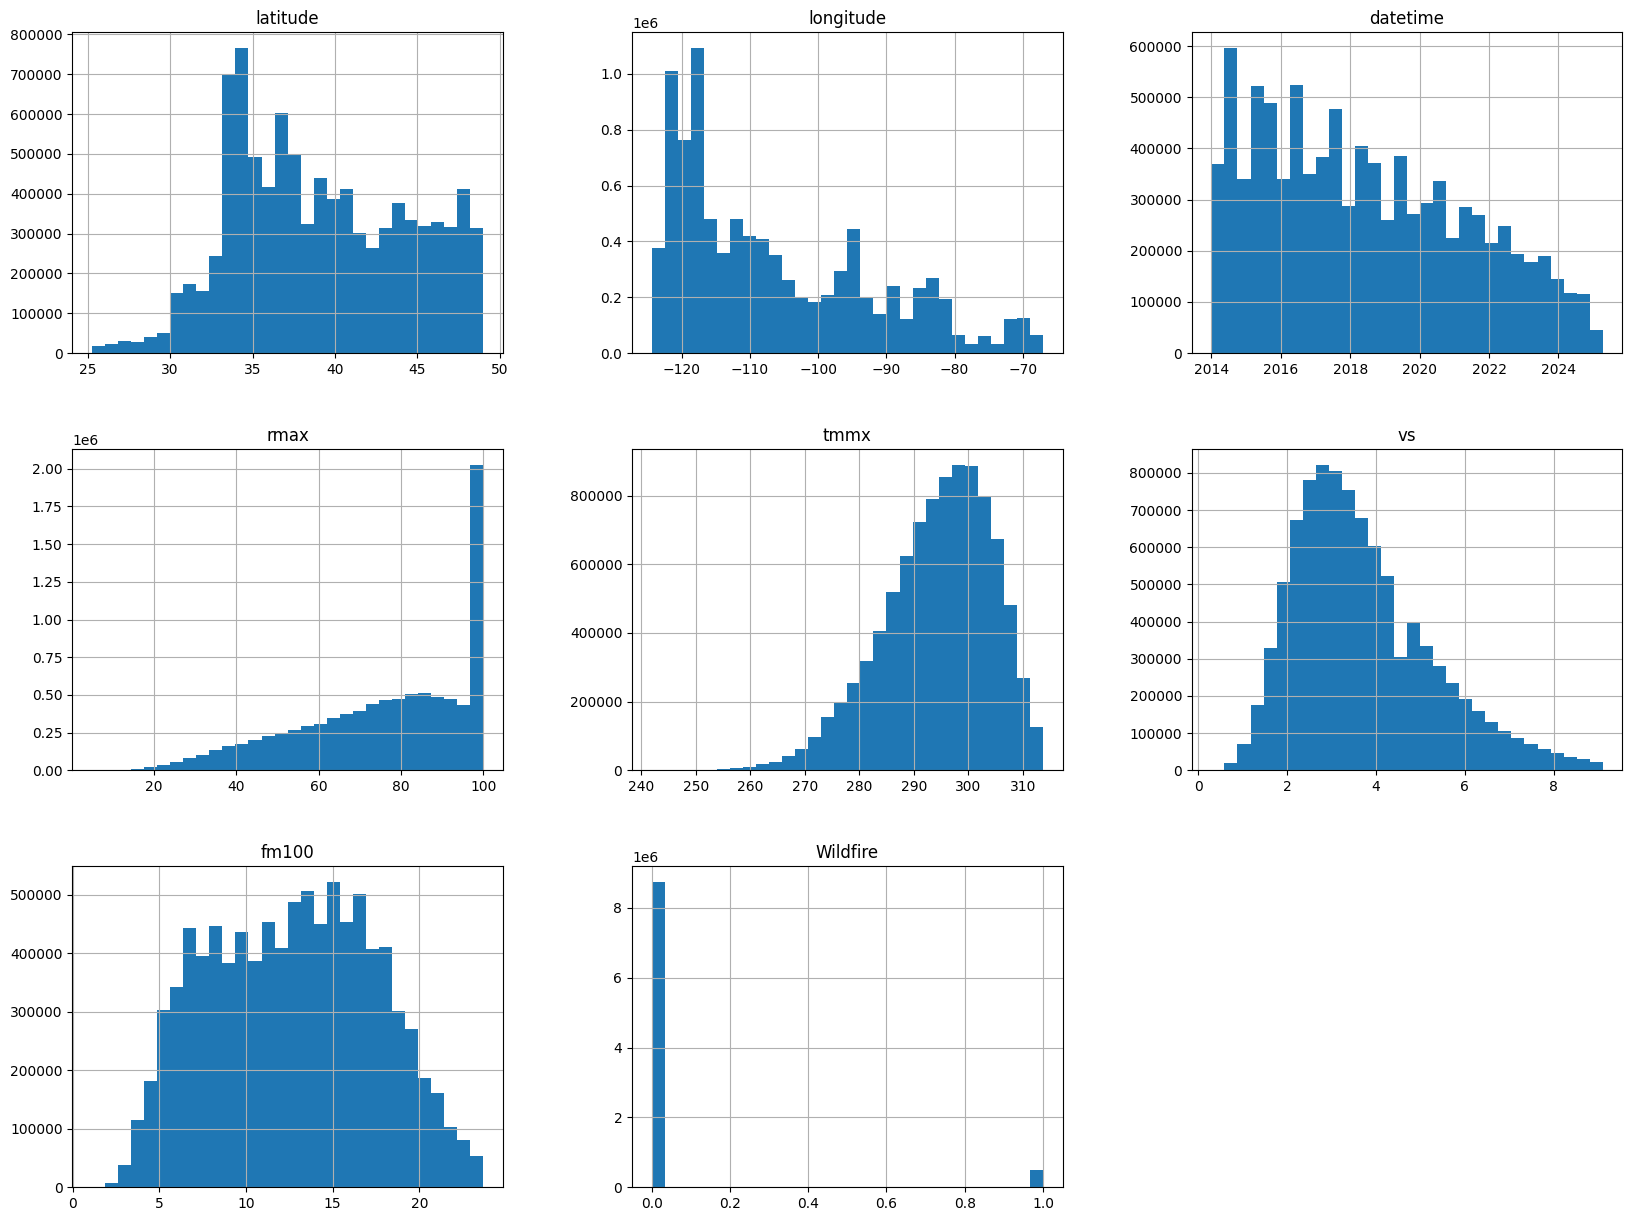

In [6]:
df.hist(bins=30, figsize=(20,15))

In [24]:
df.rmax.describe()

,rmax
count,9233434.00000
mean,76.13818
std,20.59785
min,5.00000
25%,61.90000
50%,79.70000
75%,94.70000
max,100.00000


In [8]:
df.shape

(9233434, 8)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

def clean_and_quantile_bin(df, columns, lower_q=0.10, upper_q=0.90, n_bins=5, plot=True):
    """
    Cleans a DataFrame by removing rows outside specified quantiles for multiple columns
    and optionally plots quantile-binned histograms for each column.

    Returns:
        cleaned_df (pd.DataFrame): Cleaned DataFrame
        bin_edges (dict): Dictionary of column -> list of bin edges
    """
    cleaned_df = df.copy()
    bin_edges = {}  # store bin edges for each feature

    fig, axes = plt.subplots(len(columns), 1, figsize=(8, 4 * len(columns)))
    if len(columns) == 1:
        axes = [axes]  # Ensure axes is iterable

    for i, col in enumerate(columns):
        # Determine quantile thresholds
        lower = cleaned_df[col].quantile(lower_q)
        upper = cleaned_df[col].quantile(upper_q)

        # Filter rows outside thresholds
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]

        # Compute quantile-based bins
        bins = pd.qcut(cleaned_df[col], q=n_bins, duplicates='drop')
        bin_edges[col] = [interval.left for interval in bins.cat.categories] + [bins.cat.categories[-1].right]

        if plot:
            counts = bins.value_counts().sort_index()
            counts.plot(kind='bar', ax=axes[i], edgecolor='black')
            axes[i].set_title(f'{col} Distribution (Quantile Binning)')
            axes[i].set_xlabel(f'{col} bins')
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].yaxis.set_major_formatter(ScalarFormatter())
            axes[i].ticklabel_format(style='plain', axis='y')

    if plot:
        plt.tight_layout()
        plt.show()

    return cleaned_df, bin_edges


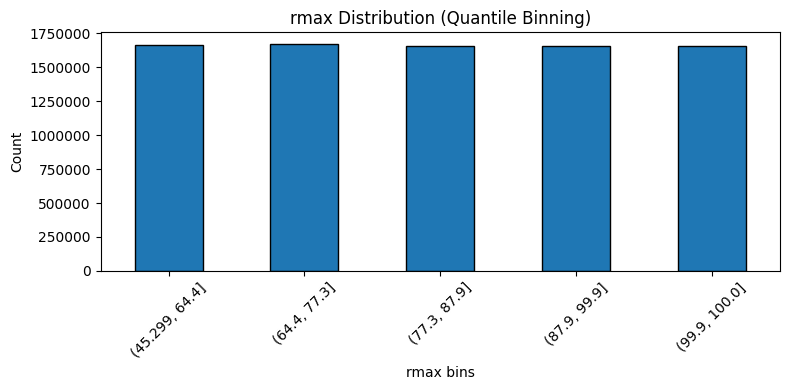

RMAX bin edges: [np.float64(45.299), np.float64(64.4), np.float64(77.3), np.float64(87.9), np.float64(99.9), np.float64(100.0)]


In [10]:
features = ['rmax']
cleaned_wild_fires, rmax_bins = clean_and_quantile_bin(wild_fires_cleaned, features)
print("RMAX bin edges:", rmax_bins['rmax'])


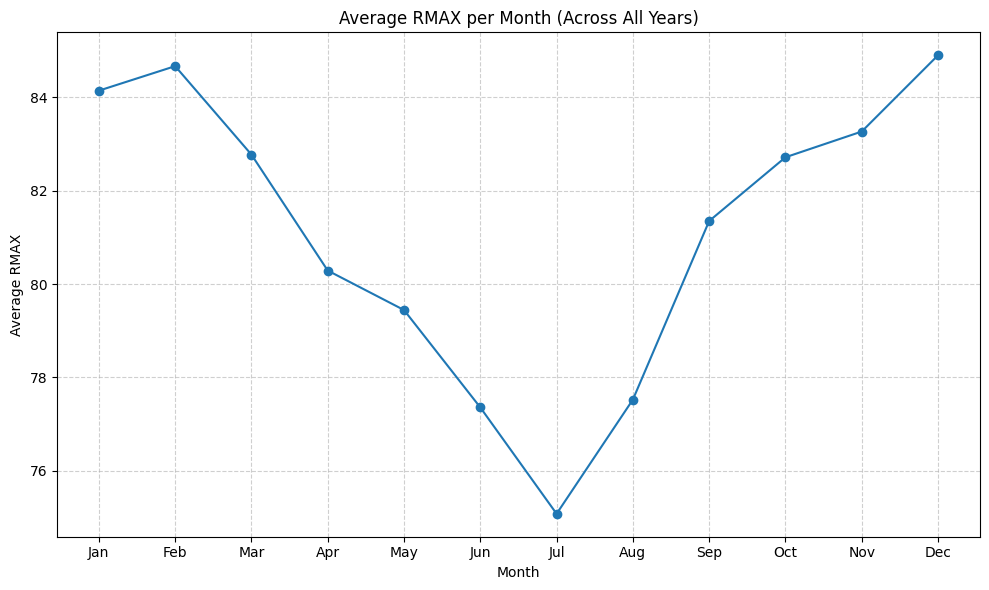

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column is in datetime format
cleaned_wild_fires['datetime'] = pd.to_datetime(cleaned_wild_fires['datetime'])

# Extract month name or number
cleaned_wild_fires['month'] = cleaned_wild_fires['datetime'].dt.month

# Group by month and calculate average rmax
monthly_avg = cleaned_wild_fires.groupby('month')['rmax'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title("Average RMAX per Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Average RMAX")
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


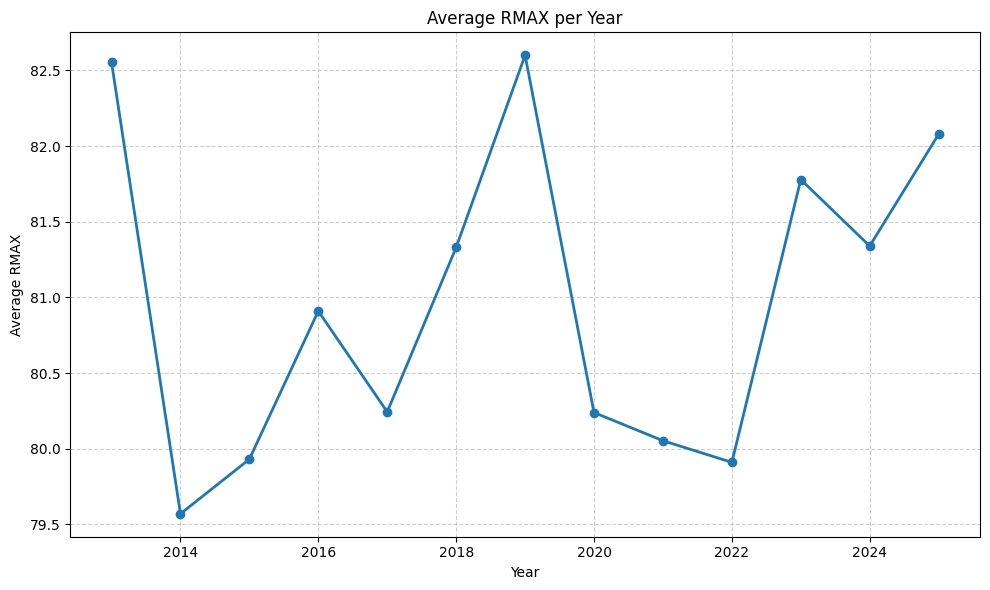

In [28]:
import matplotlib.pyplot as plt

# Ensure datetime is in datetime format
cleaned_wild_fires['datetime'] = pd.to_datetime(cleaned_wild_fires['datetime'])

# Extract the year
cleaned_wild_fires['year'] = cleaned_wild_fires['datetime'].dt.year

# Group by year and compute mean rmax
yearly_avg = cleaned_wild_fires.groupby('year')['rmax'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2)
plt.title("Average RMAX per Year")
plt.xlabel("Year")
plt.ylabel("Average RMAX")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

def label_quantile_bins(df, columns, lower_q=0.10, upper_q=0.90, n_bins=5, labels=None):
    """
    Converts numeric columns into categorical labels based on quantile bins.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        columns (list[str]): Columns to convert
        lower_q (float): Lower quantile cutoff (default 0.10)
        upper_q (float): Upper quantile cutoff (default 0.90)
        n_bins (int): Number of quantile bins (default 5)
        labels (list[str]): Custom labels for bins (default auto-generated)

    Returns:
        pd.DataFrame: DataFrame with new labeled categorical columns
        dict: Dictionary of bin edges per column
    """
    df = df.copy()
    bin_edges = {}

    # Default label names (if none provided)
    if labels is None:
        labels = [f"Bin_{i+1}" for i in range(n_bins)]

    for col in columns:
        # Filter out extreme values
        lower = df[col].quantile(lower_q)
        upper = df[col].quantile(upper_q)
        filtered = df[(df[col] >= lower) & (df[col] <= upper)][col]

        # Create quantile bins
        bins = pd.qcut(filtered, q=n_bins, duplicates='drop')
        edges = [float(interval.left) for interval in bins.cat.categories] + [float(bins.cat.categories[-1].right)]
        bin_edges[col] = edges

        # Apply bins to full column
        df[f"{col}_label"] = pd.cut(df[col], bins=edges, labels=labels, include_lowest=True)
        df.drop(columns=[col], inplace=True)

    return df, bin_edges


In [12]:
features = ['rmax']
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

labeled_df, edges = label_quantile_bins(df, features, labels=labels)

In [13]:
labeled_df.head()

,latitude,longitude,datetime,tmmx,vs,fm100,Wildfire,rmax_label
0,48.12843,-97.27669,2018-08-15,301.60000,3.00000,10.20000,0,Moderate
1,48.12843,-97.27669,2018-08-16,304.90000,3.00000,9.70000,0,Moderate
2,48.12843,-97.27669,2018-08-17,300.70000,3.10000,9.20000,0,Low
3,48.12843,-97.27669,2018-08-18,303.30000,5.10000,9.90000,0,Low
4,48.12843,-97.27669,2018-08-19,296.50000,4.70000,11.80000,0,Very High


In [14]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9233434 entries, 0 to 9509924
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   latitude    float64       
 1   longitude   float64       
 2   datetime    datetime64[ns]
 3   tmmx        float64       
 4   vs          float64       
 5   fm100       float64       
 6   Wildfire    int64         
 7   rmax_label  category      
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 572.4 MB


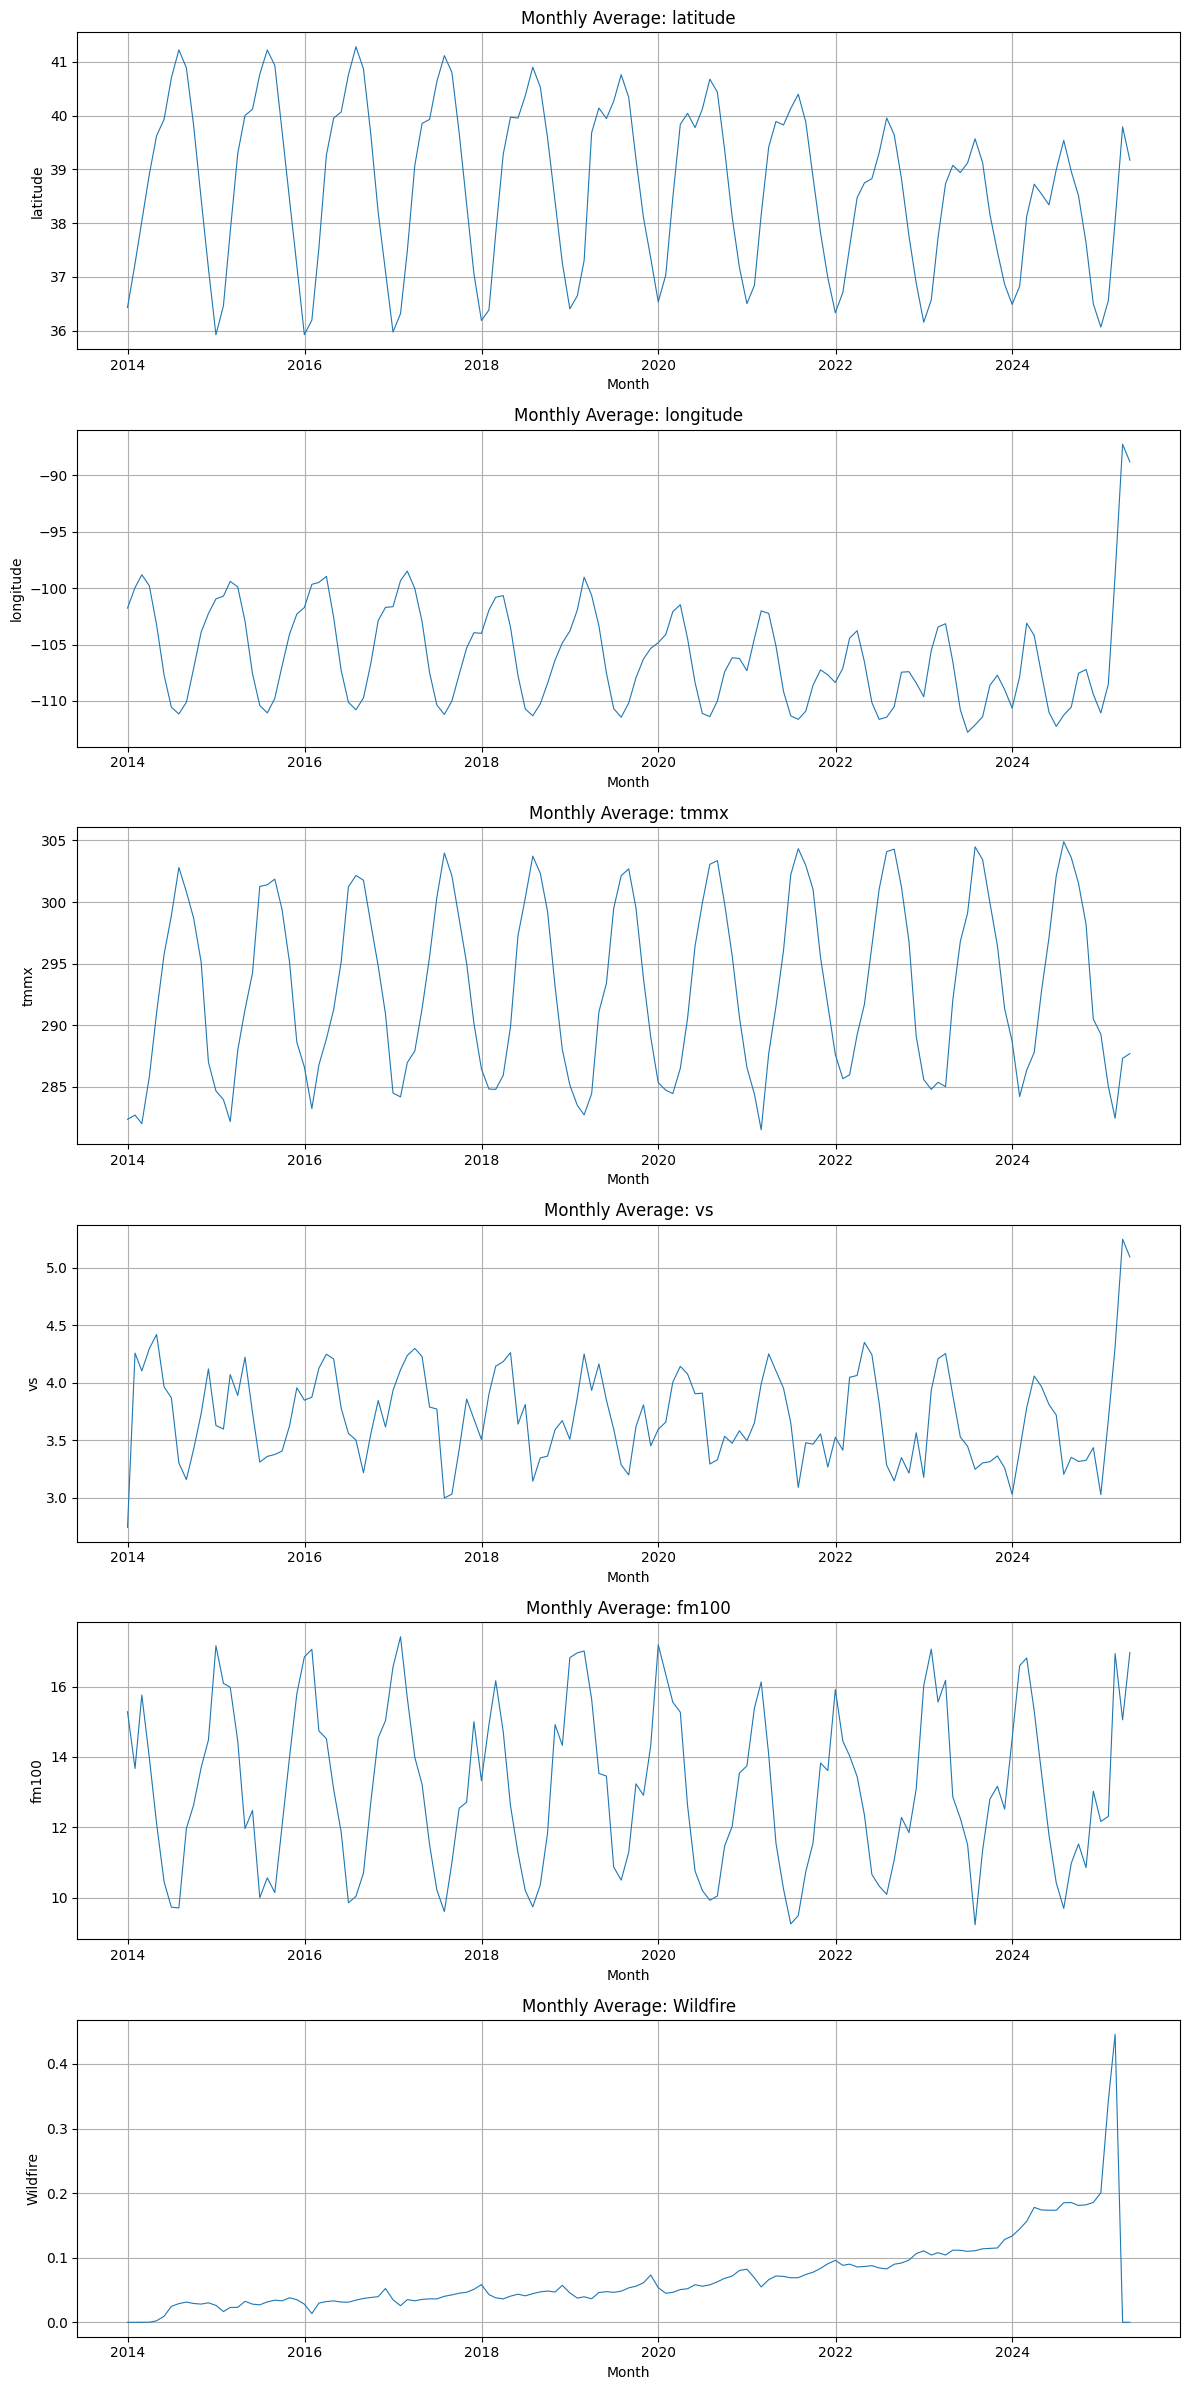

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime is in datetime format
labeled_df['datetime'] = pd.to_datetime(labeled_df['datetime'])

# Set datetime as index
df = labeled_df.set_index('datetime')

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Resample by month and calculate mean
monthly_avg = df[numeric_cols].resample('ME').mean()

# Create subplots — one per numeric column
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(12, 4 * len(numeric_cols)))
if len(numeric_cols) == 1:
    axes = [axes]  # ensure axes is iterable

for i, col in enumerate(numeric_cols):
    axes[i].plot(monthly_avg.index, monthly_avg[col], color='tab:blue', linewidth=0.8)
    axes[i].set_title(f'Monthly Average: {col}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [16]:
labeled_df['rmax_label'].value_counts(normalize=True)

,proportion
rmax_label,
Low,0.20128
Very Low,0.20002
Very High,0.19967
High,0.19959
Moderate,0.19944


/tmp/ipython-input-2545235605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labeled_df.groupby('rmax_label')['Wildfire'].value_counts(normalize=True).plot(kind='bar', stacked=True)


<Axes: xlabel='rmax_label,Wildfire'>

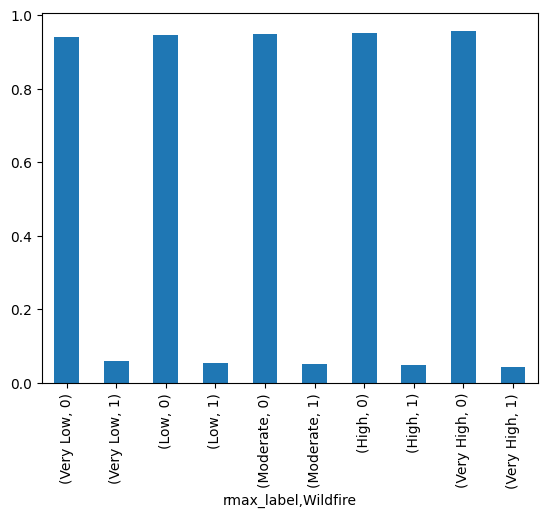

In [32]:
labeled_df.groupby('rmax_label')['Wildfire'].value_counts(normalize=True).plot(kind='bar', stacked=True)

In [18]:
# --------------------------
# 0. Make a copy for sampling & transformation
# --------------------------
df_copy = labeled_df.copy()

# Keep only rows where 'Wildfire' is not NaN
df_copy = df_copy[df_copy['Wildfire'].notna()]

# --------------------------
# 1. Separate majority and minority classes
# --------------------------
df_fire = df_copy[df_copy['Wildfire'] == 1]
df_no_fire = df_copy[df_copy['Wildfire'] == 0]

# --------------------------
# 2. Balance classes 50/50
# --------------------------
n_minority = len(df_fire)
scalar = 2
df_no_fire_sample = df_no_fire.sample(n=n_minority*scalar, random_state=42)

balanced_df = pd.concat([df_fire, df_no_fire_sample]).sample(frac=1, random_state=42)
print("Balanced dataset shape:", balanced_df.shape)
print(balanced_df['Wildfire'].value_counts())

Balanced dataset shape: (1464564, 8)
Wildfire
0    976376
1    488188
Name: count, dtype: int64


/tmp/ipython-input-2064457827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balanced_df.groupby('rmax_label')['Wildfire'].value_counts(normalize=True).plot(kind='bar', stacked=True)


<Axes: xlabel='rmax_label,Wildfire'>

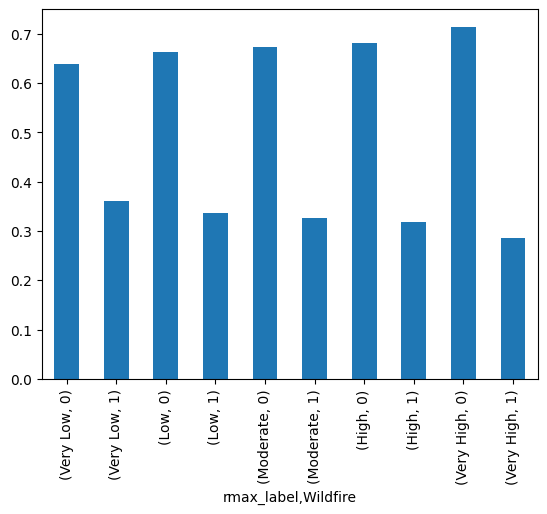

In [19]:
balanced_df.groupby('rmax_label')['Wildfire'].value_counts(normalize=True).plot(kind='bar', stacked=True)

In [19]:
balanced_df.describe()

,latitude,longitude,datetime,tmmx,vs,fm100,Wildfire
count,1464564.00000,1464564.00000,1464564,1464564.00000,1464564.00000,1464564.00000,1464564.00000
mean,38.93396,-107.36162,2018-12-17 08:06:25.877572352,294.76276,3.66079,12.43090,0.33333
min,25.26027,-124.43700,2013-12-31 00:00:00,241.90000,0.30000,1.30000,0.00000
25%,34.46618,-118.35402,2016-04-25 00:00:00,288.70000,2.50000,8.50000,0.00000
50%,37.92580,-111.87260,2018-08-21 00:00:00,295.80000,3.40000,12.50000,0.00000
75%,43.43875,-96.76076,2021-07-06 00:00:00,302.00000,4.50000,16.10000,1.00000
max,48.99873,-67.01250,2025-04-05 00:00:00,313.70000,9.10000,23.70000,1.00000
std,5.27564,14.11314,NaN,9.73186,1.54977,4.74519,0.47140


In [20]:
balanced_df.columns

Index(['latitude', 'longitude', 'datetime', 'tmmx', 'vs', 'fm100', 'Wildfire',
       'rmax_label'],
      dtype='object')

In [21]:
balanced_df.to_parquet('wildfire_data.parquet')
from google.colab import files
files.download('wildfire_data.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

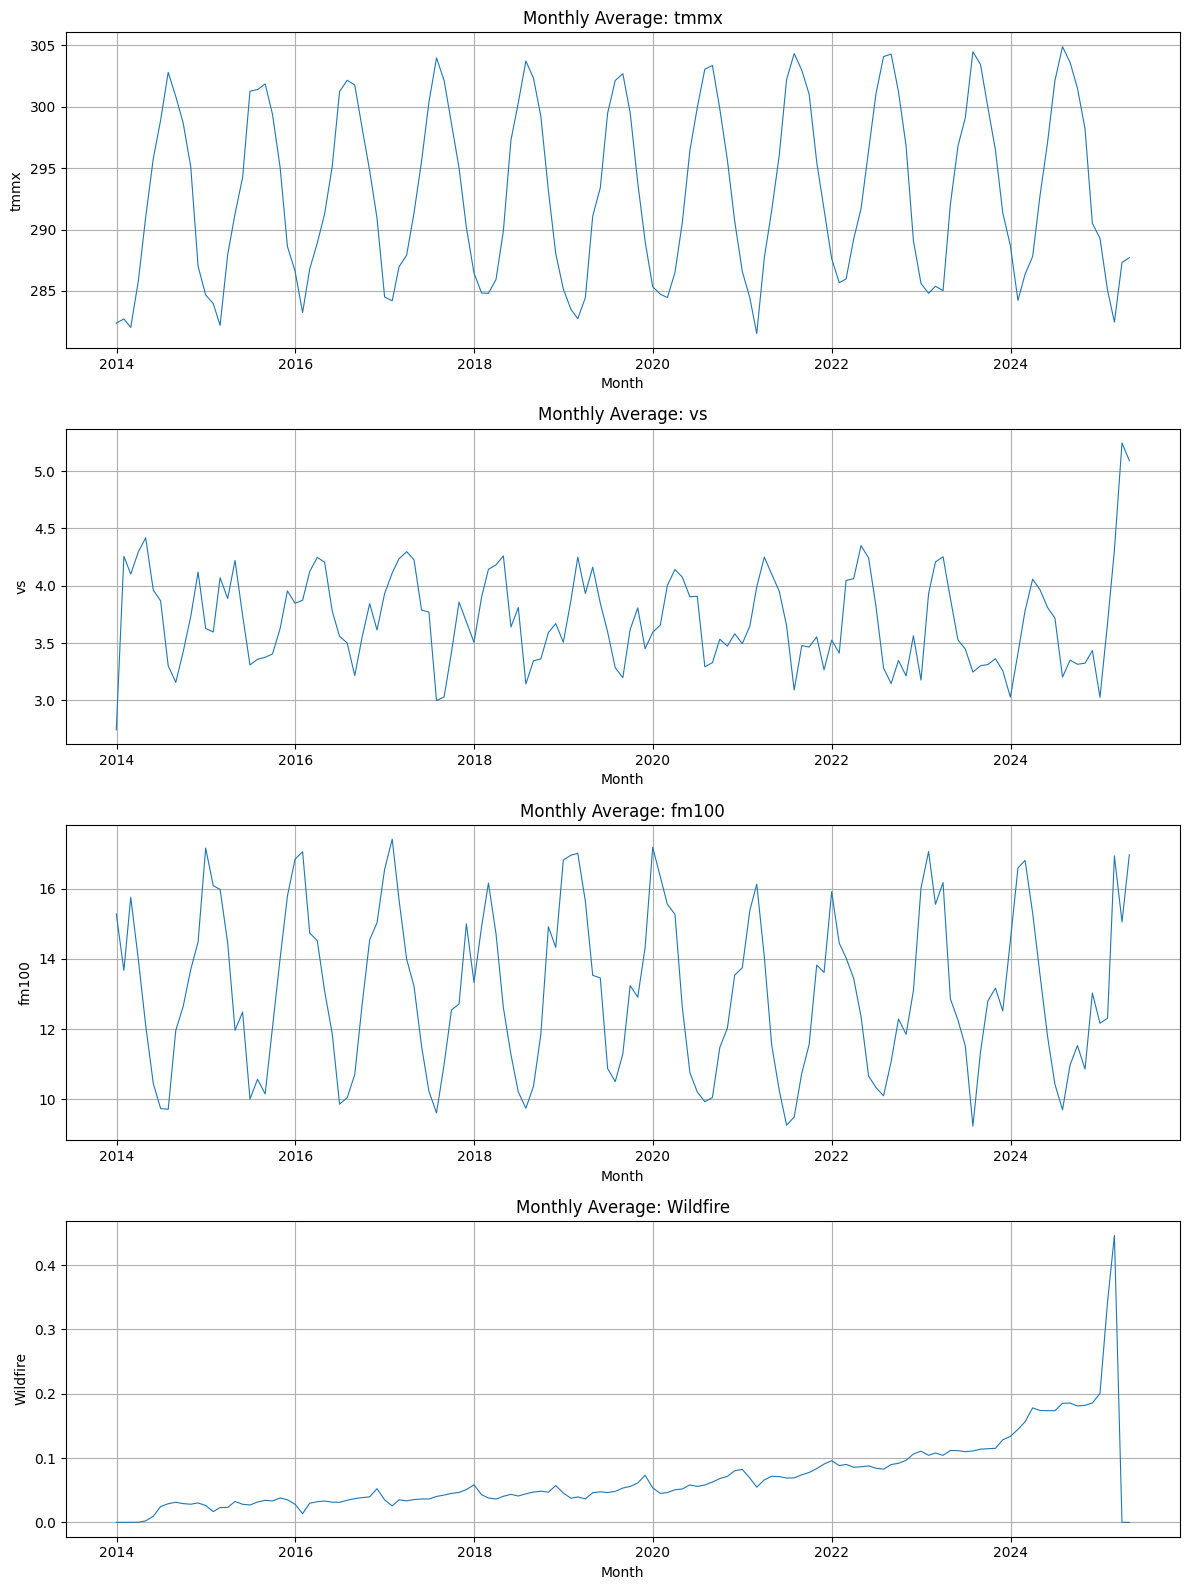

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime is in datetime format
balanced_df['datetime'] = pd.to_datetime(labeled_df['datetime'])

# Set datetime as index
df = labeled_df.set_index('datetime')

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Resample by month and calculate mean
monthly_avg = df[numeric_cols].resample('ME').mean()

# Create subplots — one per numeric column
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(12, 4 * len(numeric_cols)))
if len(numeric_cols) == 1:
    axes = [axes]  # ensure axes is iterable

for i, col in enumerate(numeric_cols):
    axes[i].plot(monthly_avg.index, monthly_avg[col], color='tab:blue', linewidth=0.8)
    axes[i].set_title(f'Monthly Average: {col}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [22]:
balanced_df.head()

,latitude,longitude,datetime,tmmx,vs,fm100,Wildfire,rmax_label
1984675,36.99016,-112.97560,2015-10-13,302.50000,1.40000,7.60000,0,Very Low
1817950,35.55327,-94.66715,2015-07-28,307.80000,3.70000,15.20000,0,High
6154043,33.91296,-118.10540,2017-10-01,298.30000,1.80000,12.80000,1,Moderate
1963711,34.42094,-117.17253,2019-07-04,303.90000,4.10000,5.00000,0,NaN
2296402,41.37521,-122.37765,2015-04-17,297.50000,2.60000,9.60000,0,Very Low


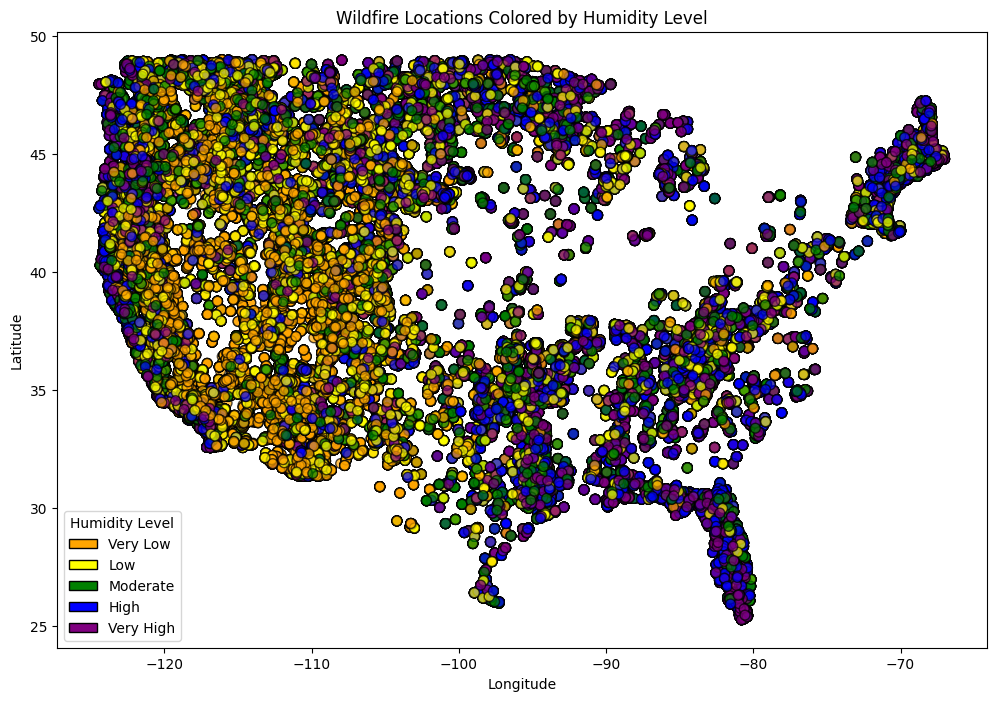

In [30]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Filter wildfires and handle missing labels
wildfires = balanced_df[balanced_df['Wildfire'] == 1].dropna(subset=['rmax_label'])

# Map categories to colors
color_dict = {
    'Very Low': 'orange',
    'Low': 'yellow',
    'Moderate': 'green',
    'High': 'blue',
    'Very High': 'purple'
}
point_colors = wildfires['rmax_label'].map(color_dict)

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(
    wildfires['longitude'],
    wildfires['latitude'],
    c=point_colors,
    s=50,
    alpha=0.7,
    edgecolor='k'
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Wildfire Locations Colored by Humidity Level')

# Create legend manually
legend_elements = [Patch(facecolor=color, edgecolor='k', label=label)
                   for label, color in color_dict.items()]
plt.legend(handles=legend_elements, title="Humidity Level")

plt.show()
